In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from sklearn.ensemble import GradientBoostingRegressor

**1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями**

In [2]:
data = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


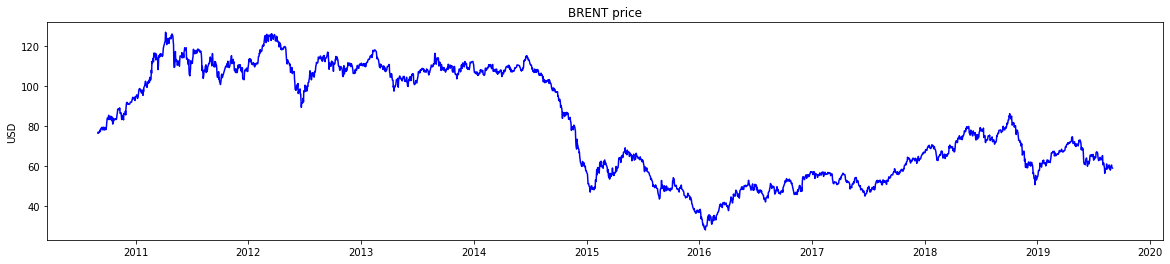

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['Значение'], 'b' )
plt.title('BRENT price' )
plt.ylabel ( 'USD' )
plt.show()

In [4]:
#представлению ряда BRENT первыми разностями

In [5]:
BRENT_diff = data['Значение'].values[1:] - data['Значение'].values[:-1]
BRENT_diff

array([ 0.52, -0.32,  0.05, ...,  0.53, -1.18, -0.35])

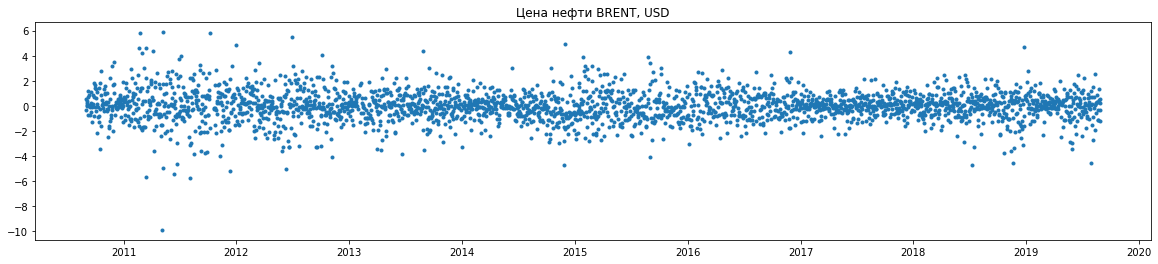

In [6]:
plt.figure(figsize=(20,4))
plt.plot(data.iloc[:-1].index, BRENT_diff,'.', label='d(BRENT)/dt')
plt.title('Цена нефти BRENT, USD')
plt.show()

In [7]:
#Обновляем значения в нашем дата фрейме на первые разности
data['Значение'].values[1:2667]=BRENT_diff

In [8]:
data = data.iloc[1:]

In [9]:
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-02,0.52,2010,9,2,3,245,35,3,0,0,0
2010-09-03,-0.32,2010,9,3,3,246,35,4,0,0,0
2010-09-04,0.05,2010,9,4,3,247,35,5,0,0,0
2010-09-05,0.01,2010,9,5,3,248,35,6,0,1,0
2010-09-06,0.24,2010,9,6,3,249,36,0,1,0,0


In [10]:
#BRENT_diff = pd.DataFrame(data = BRENT_diff , index = data.index[1:])
#BRENT_diff = BRENT_diff.rename(columns={0: 'Значение'})
#BRENT_diff.head()

**2. Добавьте первые разности по стоимости доллара и евро к рублю (можно добавить и сами курсы валют - прошлые значения)**

In [11]:
usd = pd.read_csv('usd.csv', index_col=[0], parse_dates=[0], delimiter=';', dayfirst=True)
euro = pd.read_csv('eu.csv', index_col=[0], parse_dates=[0], delimiter=';', dayfirst=True)

In [12]:
usd.head()

,curs
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [13]:
euro.head()

,curs
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [14]:
data = data.join(usd)
data = data.rename(columns={'curs': 'usd'})

In [15]:
data['usd'].fillna(method='ffill', inplace=True)

In [16]:
data = data.join(euro)
data = data.rename(columns={'curs': 'euro'})

In [17]:
data['euro'].fillna(method='ffill', inplace=True)

In [18]:
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,usd,euro
Дата,,,,,,,,,,,,,
2010-09-02,0.52,2010,9,2,3,245,35,3,0,0,0,30.8001,39.1654
2010-09-03,-0.32,2010,9,3,3,246,35,4,0,0,0,30.6858,39.2901
2010-09-04,0.05,2010,9,4,3,247,35,5,0,0,0,30.6922,39.3505
2010-09-05,0.01,2010,9,5,3,248,35,6,0,1,0,30.6922,39.3505
2010-09-06,0.24,2010,9,6,3,249,36,0,1,0,0,30.6922,39.3505


**3. сделайте ее перрасчет (ресемплинг) в представление по неделям.**

In [19]:
data_week = data.resample("W").apply('mean')
data_week.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,usd,euro
Дата,,,,,,,,,,,,,
2010-09-05,0.065000,2010.0,9.000000,3.500000,3.000000,246.500000,35.0,4.500000,0.000000,0.25,0.000000,30.717575,39.289125
2010-09-12,0.288333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.00,0.166667,30.777050,39.302883
2010-09-19,-0.021667,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.00,0.000000,30.844500,39.764250
2010-09-26,0.118333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.00,0.000000,31.012233,40.967983
2010-10-03,0.791667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.00,0.000000,30.607417,41.345817


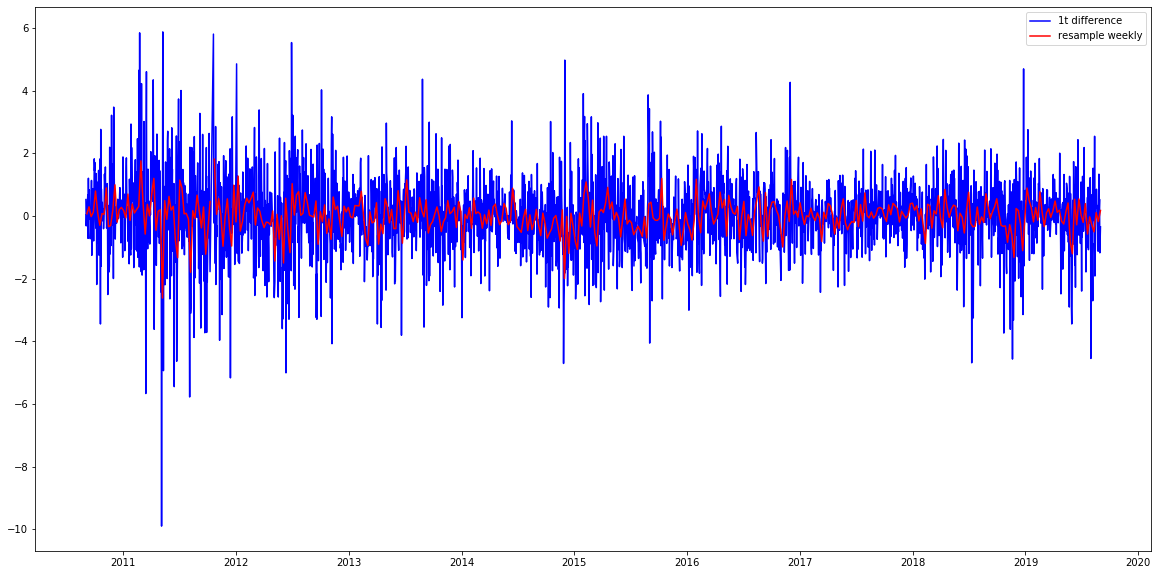

In [20]:
plt.figure(figsize=(20,10))
plt.plot(data.index, data['Значение'], 'b', label = '1t difference')
plt.plot(data_week.index, data_week['Значение'], 'r', label = 'resample weekly')
plt.legend()
plt.show()

**4. Постройте модель предсказания 1-й точки от текущей (h=1).**

In [21]:
# делим данные на train и test
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

In [22]:
train, test = split_data( data_week, -48)

In [23]:
train = train.dropna(axis=0, subset=['Значение']) 

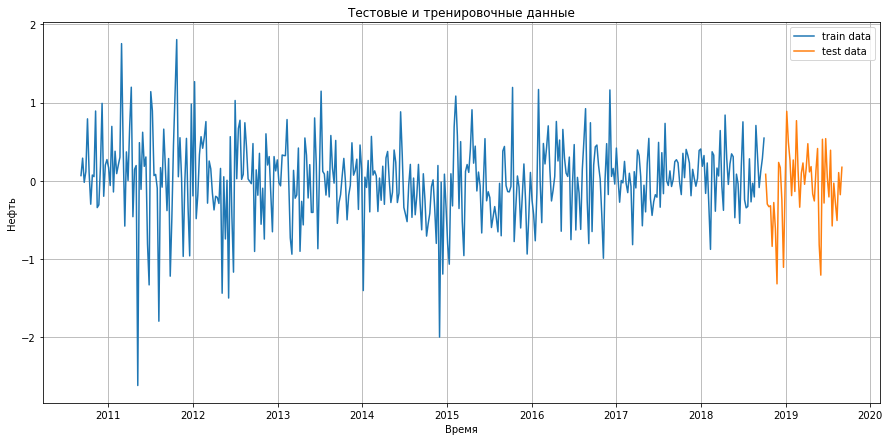

In [24]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index, train.iloc[:,0], label='train data' )
plt.plot(test.index, test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [25]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [26]:
model_g = GradientBoostingRegressor(max_depth=3, random_state=10, n_estimators=200)
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
y_pred_g = model_g.predict(X_train)
y_test_pred_g = model_g.predict(X_test)

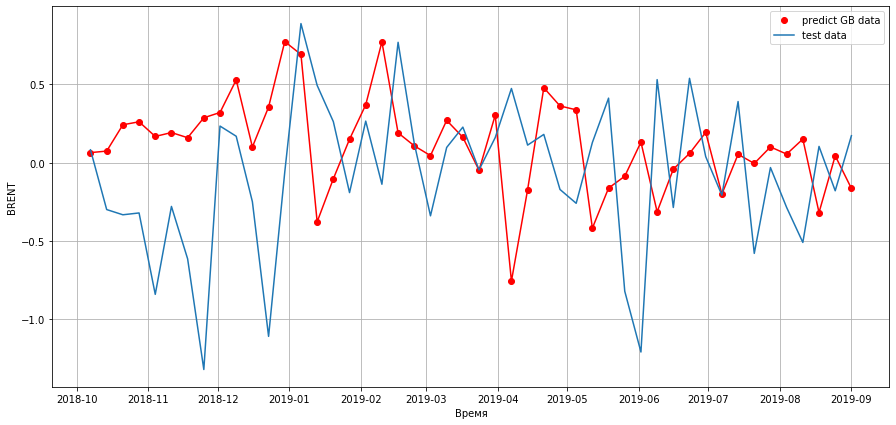

In [28]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(test.index, y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(test.index, y_test_pred_g[:100],'r' )
plt.plot(test.index, y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

In [29]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.3839685184009521 
ошибка mae  :   0.49069507479216484 
оценка R2 :   -0.7349005486435489


In [30]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr = GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -0.079 (std: 0.046)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 2
Mean validation score: -0.103 (std: 0.064)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 3
Mean validation score: -0.115 (std: 0.081)
Parameters: {'n_estimators': 300, 'max_depth': 1}



In [31]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

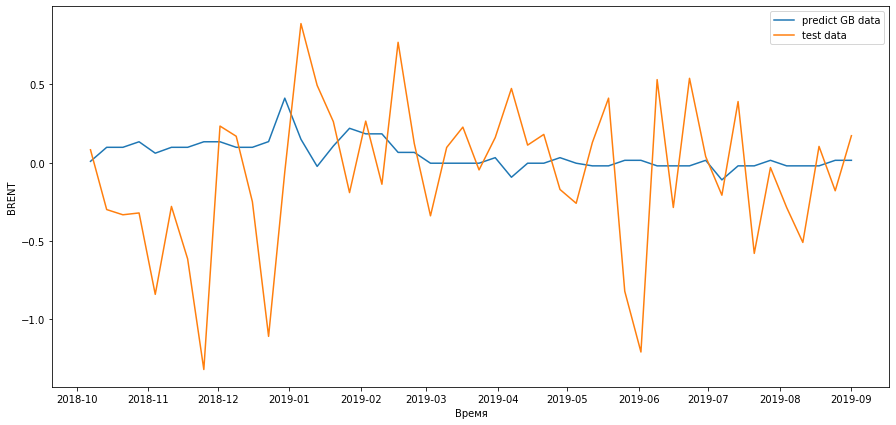

In [33]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(test.index, y_test_pred_g, label='predict GB data' )
plt.plot(test.index, y_test, label='test data')

plt.legend()
plt.show()

In [34]:
#не понял что получил